# Introducción a la microeconometría

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

## Paquetes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data

In [ ]:
Produc = sm.datasets.get_rdataset('Metal', 'Ecdat', cache=True).data
Produc.head()

,va,labor,capital
0,657.29,162.31,279.99
1,935.93,214.43,542.50
2,1110.65,186.44,721.51
3,1200.89,245.83,1167.68
4,1052.68,211.40,811.77


## Análisis exploratorio

In [ ]:
Produc.corr()

,va,labor,capital
va,1.000000,0.964578,0.975358
labor,0.964578,1.000000,0.963757
capital,0.975358,0.963757,1.000000


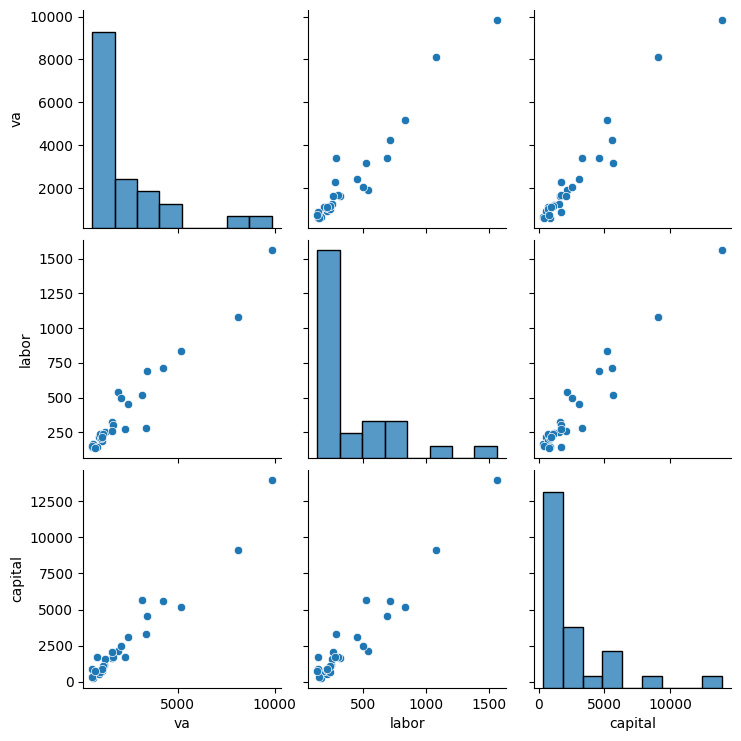

In [ ]:
sns.pairplot(Produc)

In [ ]:
np.log(Produc).corr()

,va,labor,capital
va,1.000000,0.947528,0.943117
labor,0.947528,1.000000,0.894559
capital,0.943117,0.894559,1.000000


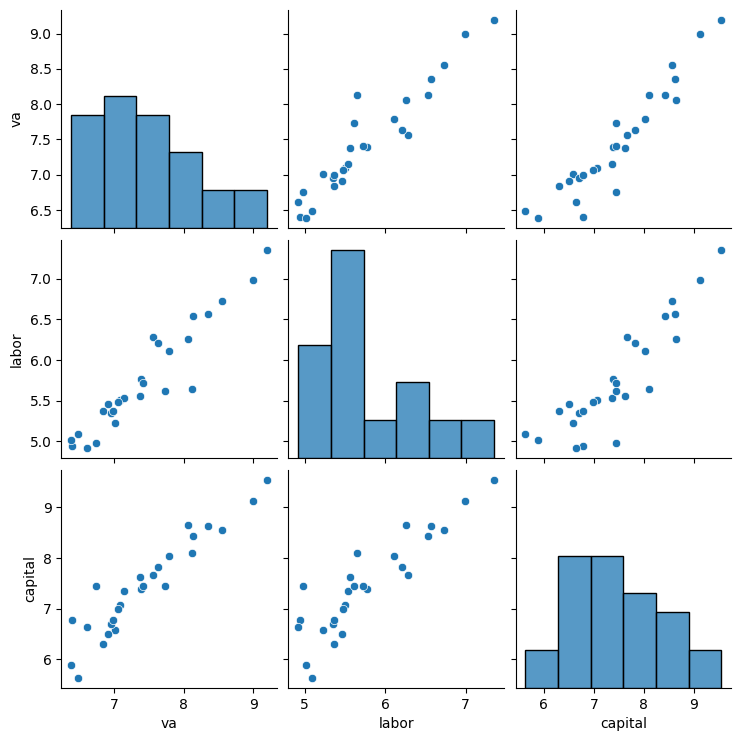

In [ ]:
sns.pairplot(np.log(Produc))

## Modelos

### Modelo Lineal


$$Q=β_0 + β_1\cdot L + β_2\cdot K$$

In [ ]:
modelo_lin = sm.OLS.from_formula("va ~ labor + capital", data=Produc)
modelo_lin_f = modelo_lin.fit()

In [ ]:
print(modelo_lin_f.summary())

                            OLS Regression Results                            
Dep. Variable:                     va   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     286.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.78e-17
Time:                        09:30:14   Log-Likelihood:                -202.84
No. Observations:                  27   AIC:                             411.7
Df Residuals:                      24   BIC:                             415.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.3376    173.431      0.659      0.5

### Modelo Cobb-Douglas

La ecuación de producción de Cobb-Douglas se expresa como:

\begin{equation}
Q = A \cdot L^\alpha \cdot K^\beta
\end{equation}

donde:
\begin{align*}
Q & \text{ es la cantidad producida,} \\
A & \text{ es la tecnología o el nivel de eficiencia,} \\
L & \text{ es la cantidad de trabajo,} \\
K & \text{ es la cantidad de capital,} \\
\alpha & \text{ y } \beta \text{ son los coeficientes de elasticidad.}
\end{align*}

Se estima por medio de:

\begin{equation}
\ln(Q) = \ln(A) + \alpha \cdot \ln(L) + \beta \cdot \ln(K)
\end{equation}

In [ ]:
modelo_coobd = sm.OLS.from_formula("np.log(va) ~ np.log(labor) + np.log(capital)", data=Produc)
modelo_coobd_f = modelo_coobd.fit()

In [ ]:
print(modelo_coobd_f.summary())

                            OLS Regression Results                            
Dep. Variable:             np.log(va)   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.07e-15
Time:                        09:30:14   Log-Likelihood:                 8.3505
No. Observations:                  27   AIC:                            -10.70
Df Residuals:                      24   BIC:                            -6.814
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1706      0.327     

\begin{equation}
Q = (3.22) \cdot L^ {0.60} \cdot K^{0.37}
\end{equation}


In [ ]:
print("AIC - Modelo Lineal:", modelo_lin_f.aic)
print("AIC - Modelo Cobb-Douglas:", modelo_coobd_f.aic)
print("\nBIC - Modelo Lineal:", modelo_lin_f.bic)
print("BIC - Modelo Cobb-Douglas:", modelo_coobd_f.bic)

AIC - Modelo Lineal: 411.67449399471707
AIC - Modelo Cobb-Douglas: -10.701082921846194

BIC - Modelo Lineal: 415.56200459273003
BIC - Modelo Cobb-Douglas: -6.813572323833206


### Comparando resultados

In [ ]:
pip install stargazer

In [ ]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [ ]:
stargazer = Stargazer([modelo_lin_f, modelo_coobd_f])
stargazer.title("Comparación entre Modelo Lineal y Cobb-Douglas")

html_table = stargazer.render_html()
HTML(html_table)


**Los coeficientes lineales** proporcionan información esencial en el modelo. El coeficiente asociado a "capital" sugiere que, manteniendo constante la variable "labor", un aumento unitario en la cantidad de "capital" se asocia con un incremento de 0.471 unidades en la variable dependiente. De manera análoga, el coeficiente para "labor" indica que, manteniendo constante la variable "capital", un aumento unitario en la cantidad de "labor" se asocia con un incremento de 2.338 unidades en la variable dependiente.

**Interpretación Cobb-Douglas**:

Los resultados indican que tanto la cantidad de "capital" como la de "labor" tienen un impacto significativo en la variable dependiente. Los coeficientes de elasticidad asociados a las variables logaritmizadas sugieren que un aumento porcentual en el logaritmo natural de "capital" se asocia con un incremento del 37.6%, mientras que un aumento porcentual en el logaritmo natural de "labor" se asocia con un incremento del 60.3% en la variable dependiente.

Estos coeficientes de elasticidad son especialmente relevantes desde una perspectiva económica, ya que miden el porcentaje de cambio en la variable dependiente en respuesta a un cambio porcentual en la variable independiente. Este enfoque permite una interpretación más intuitiva de las relaciones económicas y su impacto en la producción o el rendimiento.

## ¿Economías a escala?



La hipotesis nula implica rendimientos a escala constante:

$$H_0:\alpha + \beta = 1$$

Deseconomias a escala:

$$H_1:\alpha + \beta < 1$$

Economias a escala:

$$H_1:\alpha + \beta > 1$$

In [ ]:
restriccion = "np.log(labor) + np.log(capital) = 1"
resultado_prueba = modelo_coobd_f.t_test(restriccion)
print(resultado_prueba)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.9787      0.063     -0.340      0.737       0.850       1.108


Se mantiene la hipótesis nula de rendimientos a escala; la suma de parámetros no es lo suficientemente pequeña como para considerarse rendimientos a escala decreciente ni muy grande para ser considerados rendimientos a escala creciente.

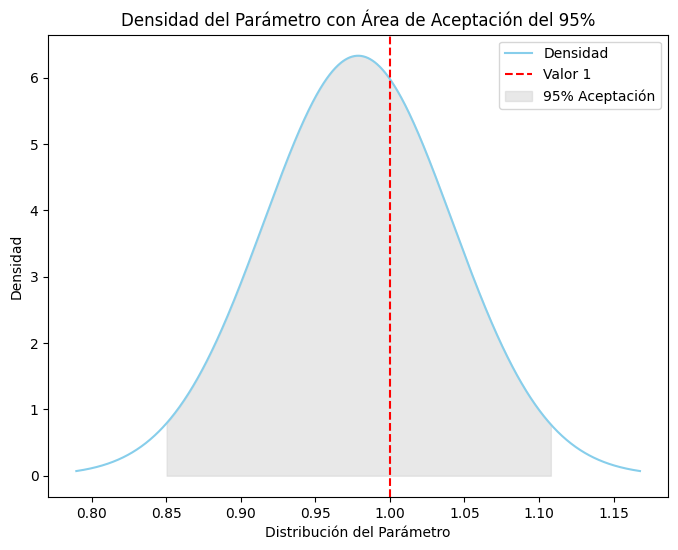

In [ ]:
from scipy.stats import norm

coeficiente = 0.9787
error_estandar = 0.063

x = np.linspace(coeficiente - 3 * error_estandar, coeficiente + 3 * error_estandar, 1000)
y = norm.pdf(x, loc=coeficiente, scale=error_estandar)

plt.figure(figsize=(8, 6))
plt.plot(x, y, color='skyblue', label='Densidad')
plt.axvline(x=1, color='red', linestyle='--', label='Valor 1')
plt.fill_between(x, y, where=[val >= 0.850 and val <= 1.108 for val in x], color='lightgray', alpha=0.5, label='95% Aceptación')
plt.xlabel('Distribución del Parámetro')
plt.ylabel('Densidad')
plt.title('Densidad del Parámetro con Área de Aceptación del 95%')
plt.legend()
plt.show()

## Analisis microeconómico

### Isocuanta de producción

In [ ]:
A, alpha, beta = modelo_coobd_f.params
A = np.exp(A)

In [ ]:
prod = Produc.va.quantile([0.25,0.5,0.75]).to_list()
prod

[1028.565, 1601.98, 2801.64]

In [ ]:
L = np.arange(1,500,1)

In [ ]:
K = np.arange(1,1000,1)

In [ ]:
def isocuanta(Q_,L_,A_,alpha_,beta_):
  K_ = (Q_/(A_*L_**(beta_)))**(1/alpha_)
  return K_

In [ ]:
l_k = []
for x in prod:
  l_k.append(isocuanta(x,L,A,alpha,beta))

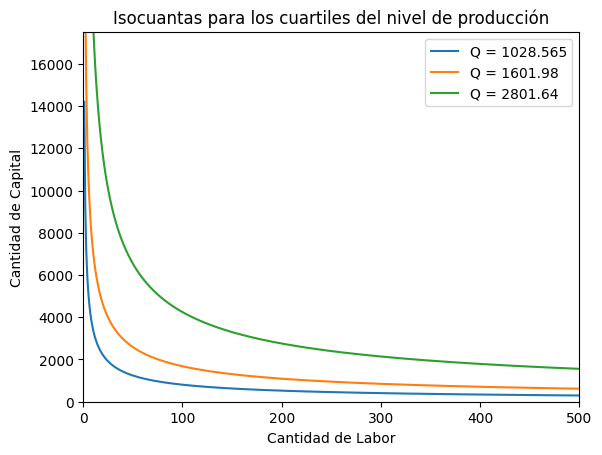

In [ ]:
fig,ax = plt.subplots()
for x in range(len(prod)):
  plt.plot(L,l_k[x],label=f'Q = {prod[x]}')
ax.legend()
ax.set_ylim((0,17500))
ax.set_xlim((0,500))
ax.set_xlabel('Cantidad de Labor')
ax.set_ylabel('Cantidad de Capital')
plt.title('Isocuantas para los cuartiles del nivel de producción')
plt.show()

### Productividad marginal

In [ ]:
def mp_labor(L, K):
    return alpha * A * (L**(alpha-1)) * (K**beta)

def mp_capital(L, K):
    return beta * A * (L**alpha) * (K**(beta-1))

In [ ]:
n_lab = Produc.labor.quantile([0.25,0.5,0.75]).to_list()
n_lab

[212.91500000000002, 259.91, 509.67]

In [ ]:
n_cap = Produc.capital.quantile([0.25,0.5,0.75]).to_list()
n_cap

[843.5699999999999, 1696.98, 3179.3149999999996]

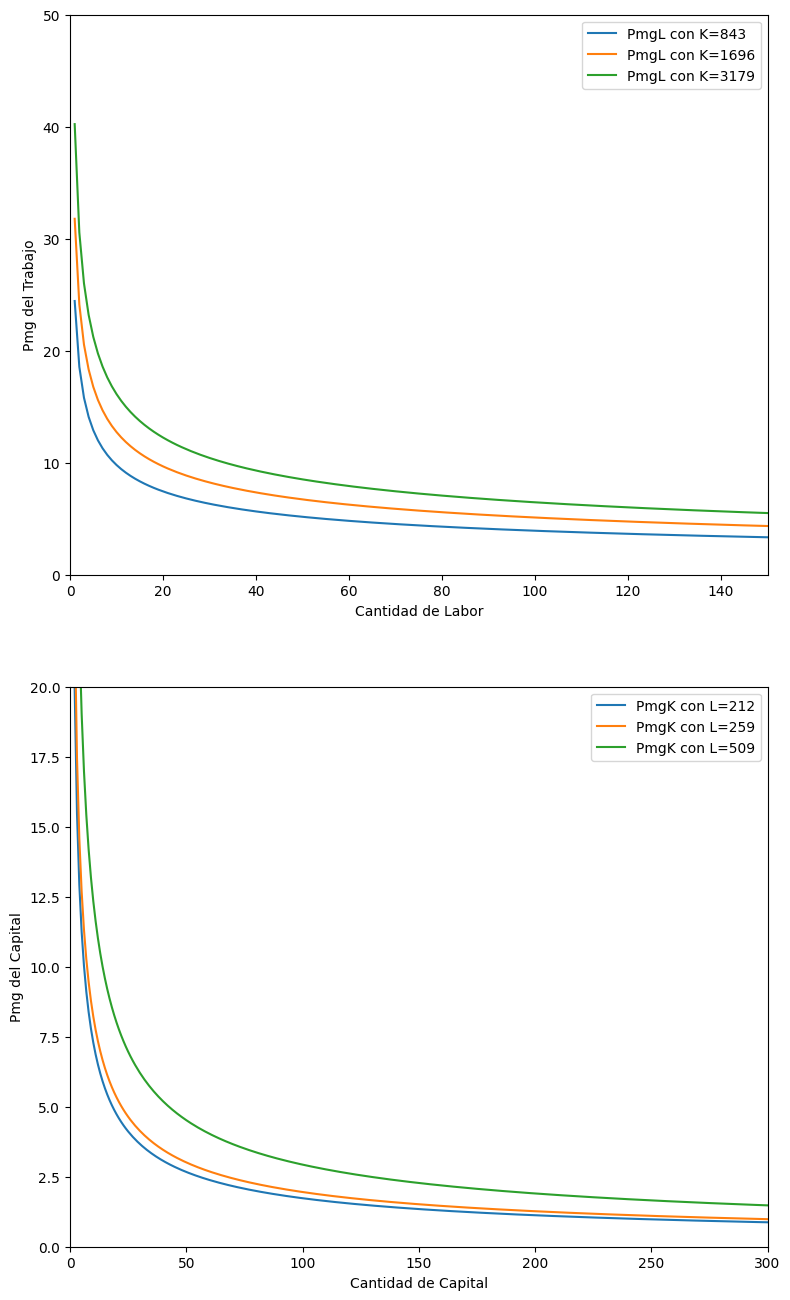

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 16))

for x in range(len(prod)):
  ax1.plot(L,mp_labor(L, n_cap[x]),label=f'PmgL con K={int(n_cap[x])}')
  ax2.plot(K,mp_capital(n_lab[x], K),label=f'PmgK con L={int(n_lab[x])}')
ax1.legend()
ax2.legend()
ax1.set_ylim((0,50))
ax1.set_xlim((0,150))
ax2.set_ylim((0,20))
ax2.set_xlim((0,300))

ax1.set_xlabel('Cantidad de Labor')
ax1.set_ylabel('Pmg del Trabajo')

ax2.set_xlabel('Cantidad de Capital')
ax2.set_ylabel('Pmg del Capital')
plt.show()

## Fuente

Data: [Metal](https://search.r-project.org/CRAN/refmans/Ecdat/html/Metal.html)